In [1]:
#from sympy import *
import numpy as np
from numpy import pi
#from sympy import DiracDelta
import itertools
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

import os
import glob

In [2]:
i = np.complex(0,1)

Identity = np.mat([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
Gamma0   = np.mat([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, 0, -1]])
Gamma1   = np.mat([[0, 0, 0, 1], [0, 0, 1, 0], [0, -1, 0, 0], [-1, 0, 0,0]])
Gamma2   = np.mat([[0, 0, 0, -i], [0, 0, i, 0], [0, i, 0, 0], [-i, 0, 0, 0]])
Gamma3   = np.mat([[0, 0, 1, 0], [0, 0, 0, -1], [-1, 0, 0, 0], [0, 1, 0, 0]])
a = np.dot(Gamma0,Gamma1);b = np.dot(Gamma2,Gamma3)
Gamma5   = i*np.dot(a,b)

CoGamma0 = Gamma0
CoGamma1 = -Gamma1
CoGamma2 = -Gamma2
CoGamma3 = -Gamma3
CoGamma5 = Gamma5

TwoPR = (Identity + Gamma5)
TwoPL = (Identity - Gamma5)

G00PL = np.dot(np.dot(Gamma0,Gamma0),TwoPL)
G01PL = np.dot(np.dot(Gamma0,Gamma1),TwoPL)
G02PL = np.dot(np.dot(Gamma0,Gamma2),TwoPL)
G03PL = np.dot(np.dot(Gamma0,Gamma3),TwoPL)

CG00PL = np.dot(np.dot(Gamma0,CoGamma0),TwoPL)
CG01PL = np.dot(np.dot(Gamma0,CoGamma1),TwoPL)
CG02PL = np.dot(np.dot(Gamma0,CoGamma2),TwoPL)
CG03PL = np.dot(np.dot(Gamma0,CoGamma3),TwoPL)

In [3]:
Gf = 1.16636e-5
rt2 = np.sqrt(2)
def element(a,b,c,d):
    return Gf/rt2*(np.dot(a,np.dot(G00PL,np.transpose(b)))*np.dot(c,np.dot(CG00PL,np.transpose(d))) + \
                   np.dot(a,np.dot(G01PL,np.transpose(b)))*np.dot(c,np.dot(CG01PL,np.transpose(d))) + \
                   np.dot(a,np.dot(G02PL,np.transpose(b)))*np.dot(c,np.dot(CG02PL,np.transpose(d))) + \
                   np.dot(a,np.dot(G03PL,np.transpose(b)))*np.dot(c,np.dot(CG03PL,np.transpose(d))))

In [4]:
masses= [100e-3, 0.0, 0., 511e-6, pi/2]

In [5]:
def Msqrd(spinnor):
    v0up = spinnor[0]
    v0dn = spinnor[1]
    v1up = spinnor[2]
    v1dn = spinnor[3]
    u2up = spinnor[4]
    u2dn = spinnor[5]
    v3up = spinnor[6]
    v3dn = spinnor[7]
    
    M1   = element(v0up, v1up, u2up, v3up)*np.conjugate(element(v0up, v1up, u2up, v3up))
    M2   = element(v0up, v1dn, u2up, v3up)*np.conjugate(element(v0up, v1dn, u2up, v3up))
    M3   = element(v0up, v1up, u2dn, v3up)*np.conjugate(element(v0up, v1up, u2dn, v3up))
    M4   = element(v0up, v1up, u2up, v3dn)*np.conjugate(element(v0up, v1up, u2up, v3dn))
    M5   = element(v0up, v1dn, u2dn, v3up)*np.conjugate(element(v0up, v1dn, u2dn, v3up))
    M6   = element(v0up, v1dn, u2up, v3dn)*np.conjugate(element(v0up, v1dn, u2up, v3dn))
    M7   = element(v0up, v1dn, u2dn, v3dn)*np.conjugate(element(v0up, v1dn, u2dn, v3dn))
    M8   = element(v0up, v1up, u2dn, v3dn)*np.conjugate(element(v0up, v1up, u2dn, v3dn))
    M9   = element(v0dn, v1up, u2up, v3up)*np.conjugate(element(v0dn, v1up, u2up, v3up))
    M10  = element(v0dn, v1dn, u2up, v3up)*np.conjugate(element(v0dn, v1dn, u2up, v3up))
    M11  = element(v0dn, v1up, u2dn, v3up)*np.conjugate(element(v0dn, v1up, u2dn, v3up))
    M12  = element(v0dn, v1up, u2up, v3dn)*np.conjugate(element(v0dn, v1up, u2up, v3dn))
    M13  = element(v0dn, v1dn, u2dn, v3up)*np.conjugate(element(v0dn, v1dn, u2dn, v3up))
    M14  = element(v0dn, v1dn, u2up, v3dn)*np.conjugate(element(v0dn, v1dn, u2up, v3dn))
    M15  = element(v0dn, v1dn, u2dn, v3dn)*np.conjugate(element(v0dn, v1dn, u2dn, v3dn))
    M16  = element(v0dn, v1up, u2dn, v3dn)*np.conjugate(element(v0dn, v1up, u2dn, v3dn))
    Mtot = M1+M2+M3+M4+M5+M6+M7+M8+M9+M10+M11+M12+M13+M14+M15+M16
    return Mtot

In [6]:
cd /Users/austinmcdonald/Desktop/muo-true/

/Users/austinmcdonald/Desktop/muo-true


In [7]:
path = '/Users/austinmcdonald/Desktop/muo-true/'

In [8]:
files = os.listdir()
files

['testTRUE0.txt']

In [9]:
path = '/Users/austinmcdonald/Desktop/muo-true/'
VALUES = []
for x in range(0,len(files)):
    holder = np.genfromtxt(path+files[x], delimiter=",")
    for y in range(0,len(holder)):
        
        VALUES.append(holder[y])
VALUES = np.array(VALUES)

In [10]:
len(VALUES)

3072

In [11]:
a = VALUES
a = np.array(a)
len( a[:,0])

3072

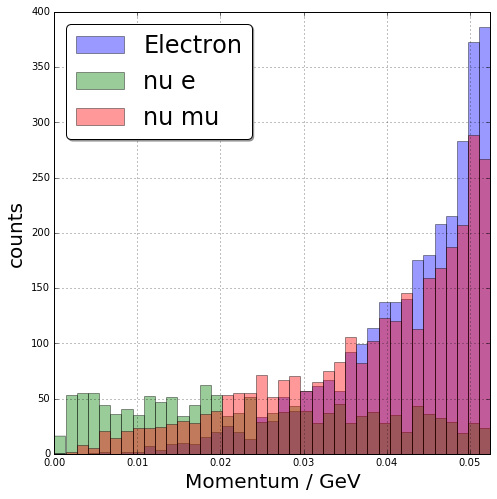

In [12]:
P1 = VALUES[:,0]
P2 = VALUES[:,1]
P3 = VALUES[:,2]
plt.figure(figsize=(7,7))
num =40
#plt.title(r'',fontsize=20)
plt.hist(P3,label='Electron',alpha=0.4,color='b',bins=np.linspace(0,105e-3/2,num))
plt.hist(P2,label='nu e',alpha=0.4,color='g',bins=np.linspace(0,105e-3/2,num))
plt.hist(P1,label='nu mu',alpha=0.4,color='r',bins=np.linspace(0,105e-3/2,num))

plt.xlabel('Momentum / GeV',fontsize=20)
plt.ylabel("counts",fontsize=20)

plt.xlim(0,105e-3/2)
#plt.ylim(0,90)
plt.legend(loc='upper left',fontsize=24,shadow=True, fancybox=True)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/fitting/'+'chihistRAND-cutwhole')
plt.show()

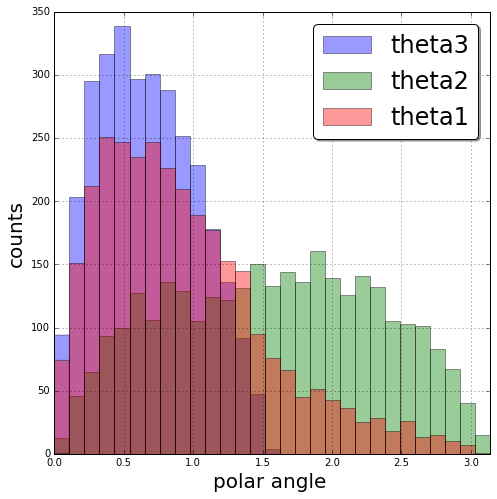

In [13]:
T1 = VALUES[:,3]
T2 = VALUES[:,4]
T3 = VALUES[:,5]
plt.figure(figsize=(7,7))
num =30
#plt.title(r'',fontsize=20)
plt.hist(T3,label='theta3',alpha=0.4,color='b',bins=np.linspace(0,pi,num))
plt.hist(T2,label='theta2',alpha=0.4,color='g',bins=np.linspace(0,pi,num))
plt.hist(T1,label='theta1',alpha=0.4,color='r',bins=np.linspace(0,pi,num))

plt.xlabel('polar angle ',fontsize=20)
plt.ylabel("counts",fontsize=20)
plt.xlim(0,pi)
#plt.ylim(0,90)
plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/fitting/'+'chihistRAND-cutwhole')
plt.show()

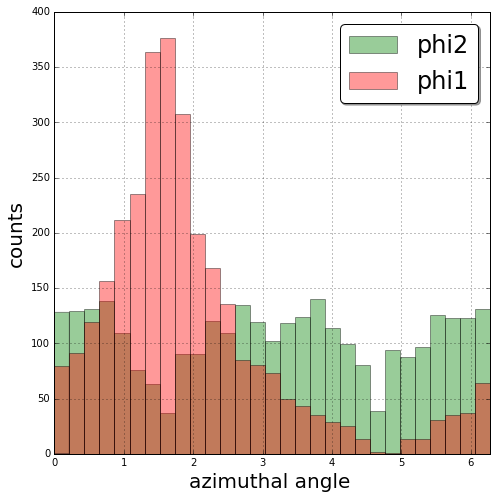

In [14]:
Phi1 = VALUES[0:,6]
Phi2 = VALUES[0:,7]
plt.figure(figsize=(7,7))
num =30
#plt.title(r'',fontsize=20)
plt.hist(Phi2,label='phi2',alpha=0.4,color='g',bins=np.linspace(0,2*pi,num))
plt.hist(Phi1,label='phi1',alpha=0.4,color='r',bins=np.linspace(0,2*pi,num))

plt.xlabel('azimuthal angle ',fontsize=20)
plt.ylabel("counts",fontsize=20)
plt.xlim(0,2*pi)
#plt.ylim(0,90)
plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/fitting/'+'chihistRAND-cutwhole')
plt.show()

In [15]:
def Spinnors(x,y):
    p1     = x[0]
    p2     = x[1]
    p3     = x[2]
    theta1 = x[3]
    theta2 = x[4]
    theta3 = x[5]
    phi1   = x[6]
    phi2   = x[7]
    phi3   = y[4]
    m0     = y[0]
    m1     = y[1]
    m2     = y[2]
    m3     = y[3]
    
    #T3simp = np.arcsin((p1*np.sin(theta1)*np.sin(phi1)+p2simp*np.sin(theta2)*np.sin(phi2))/p3simp)
    E1 = np.sqrt(p1**2 + m1**2)
    E2 = np.sqrt(p2**2 + m2**2)
    #E3simp = m0-p1-m1**2/(2*p1)-p2simp-m2**2/(2*p2simp)
    E3 = np.sqrt(p3**2 + m3**2)

    s1 =  np.sin(theta1/2)
    s2 =  np.sin(theta2/2)
    s3 =  np.sin(theta3/2)
    c1 =  np.cos(theta1/2)
    c2 =  np.cos(theta2/2)
    c3 =  np.cos(theta3/2)
    ei1 = np.exp(i*phi1)
    ei2 = np.exp(i*phi2)
    ei3 = np.exp(i*phi3)

    N1 = np.sqrt(E1+m1) #sqrt(p1**2+2*m1**2)
    N2 = np.sqrt(E2+m2)
    N3 = np.sqrt(E3+m3)
    con1 = p1/(m1+E1) # p1/(m1+sqrt(p1**2+m1**2))
    con2 = p2/(m2+E2)
    con3 = p3/(m3+E3)

    v0up = np.sqrt(2*m0)*np.mat([0,0,0,1])
    v0dn = np.sqrt(2*m0)*np.mat([0,0,1,0])   
    
    v1up = N1*np.mat([con1*s1,-con1*c1*ei1,-s1,c1*ei1])
    v1dn = N1*np.mat([con1*c1,con1*s1*ei1,c1,s1*ei1])

    v3up = N3*np.mat([con3*s3,-con3*c3*ei3,-s3,c3*ei3])
    v3dn = N3*np.mat([con3*c3,con3*s3*ei3,c3,s3*ei3])

    u2up = N2*np.mat([c2,s2*ei2,con2*c2,con2*s2*ei2])
    u2dn = N2*np.mat([-s2,c2*ei2,con2*s2,-con2*c2*ei2])


    dLIPS = 1/(64*(pi)**5*m0)*1/(E1*E2*E3)*p1**2*p2**2*p3**2*np.sin(theta1)*np.sin(theta2)
    
    return [v0up, v0dn, v1up, v1dn, u2up, u2dn, v3up, v3dn], [dLIPS]#,[p3simp,E3simp,C3simp,AA,A,BB,B,CC,C,con3,N3]

In [27]:
def integrand(x):
    P1 = x[0]
    P2 = x[1]
    P3 = x[2]
    T1 = x[3]
    T2 = x[4]
    T3 = x[5]
    Ph1 = x[6]
    Ph2 = x[7]
    masses   = [105e-3, 0.0, 0.0, 511e-6, pi/2]
    Values   = [P1,P2,P3,T1,T2,T3,Ph1,Ph2]
    
    X ,Y= Spinnors(Values, masses)
    MSQRD = np.asarray(Msqrd(X))[0][0]
    DLIPS = np.asarray(Y)[0]
    VAL = MSQRD#*DLIPS
    return VAL

In [17]:
domainsize = math.pow(math.pi,4)*4*(105e-3-511e-6)/2

length = len(VALUES)
total = 0.0
total_sq = 0.0
for x in range(0,length):
    FF = VALUES[x]
    f = integrand(FF)
    total += f
    total_sq += (f**2)
sample_mean = total/length
sample_var = (total_sq - ((total/length)**2)/length)/(length-1.0)
#sample_var = np.sqrt((total_sq - total**2)/(length-1))

In [18]:
sample_mean*domainsize

(3.5327729893271413e-21+0j)

In [19]:
sample_var

(1.1206568414367471e-43+0j)

In [48]:
TEST = []
Ptres=[]
length = len(VALUES)
total = 0.0
total_sq = 0.0
for x in range(0,length):
    FF = VALUES[x]
    f = integrand(FF)
    TEST.append(abs(f))
    Ptres.append(Ptre(VALUES[x]))
    total += f
sample_mean = total/length

In [47]:
def Ptre(x):
    p1     = x[0]
    p2     = x[1]
    p3     = x[2]
    theta1 = x[3]
    theta2 = x[4]
    theta3 = x[5]
    phi1   = x[6]
    phi2   = x[7]

    
    p3simp = np.sqrt((p1**2+p2**2+2*p1*p2*(np.cos(theta1)*np.cos(theta2)+np.cos(phi1-phi2)*np.sin(theta1)*np.sin(theta2))))
    return [p3simp]

In [53]:
max(VALUES[:,2])

0.052491774572934899

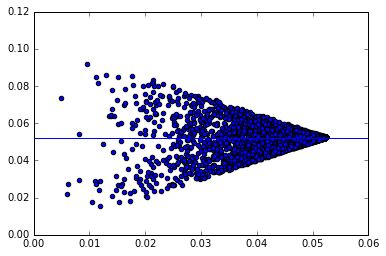

In [51]:
a=min(TEST)
b=max(TEST)
plt.scatter(VALUES[:,2],Ptres)
#plt.semilogy()
#plt.loglog()
plt.xlim(0,0.06)
plt.axhline((105e-3-511e-6)/2)
#plt.ylim(a,b)
#plt.ylim(1e-27,2e-21)

(9.6387310240962048e-20, 1.3097976910641746e-13)

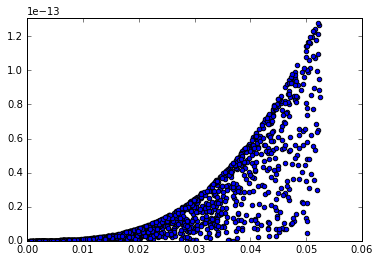

In [36]:
a=min(TEST)
b=max(TEST)
plt.scatter(VALUES[:,1],TEST)
#plt.semilogy()
#plt.loglog()
plt.xlim(0,0.06)
plt.ylim(a,b)
#plt.ylim(1e-27,2e-21)

(9.6387310240962048e-20, 1.3097976910641746e-13)

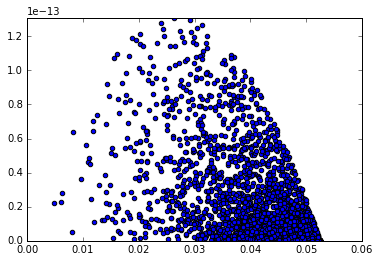

In [38]:
a=min(TEST)
b=max(TEST)
plt.scatter(VALUES[:,2],TEST)
#plt.semilogy()
#plt.loglog()
plt.xlim(0,0.06)
plt.ylim(a,b)
#plt.ylim(1e-27,2e-21)

(1e-27, 2e-21)

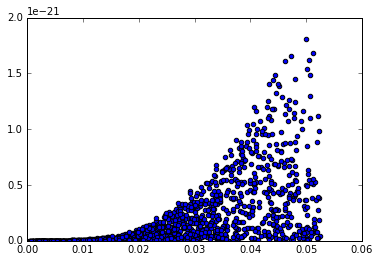

In [22]:
plt.scatter(VALUES[:,1],TEST)
#plt.semilogy()
#plt.loglog()
plt.xlim(0,0.06)
plt.ylim(1e-27,2e-21)

(1e-27, 2e-21)

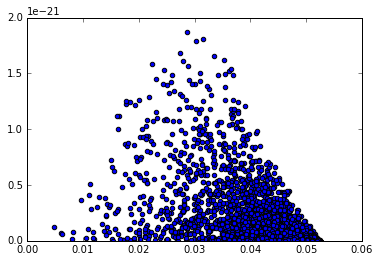

In [23]:
plt.scatter(VALUES[:,2],TEST)
#plt.semilogy()
#plt.loglog()
plt.xlim(0,0.06)
plt.ylim(1e-27,2e-21)

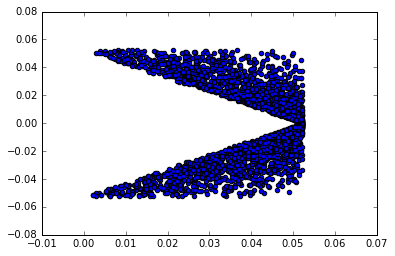

In [24]:
plt.scatter(VALUES[:,0],VALUES[:,1])

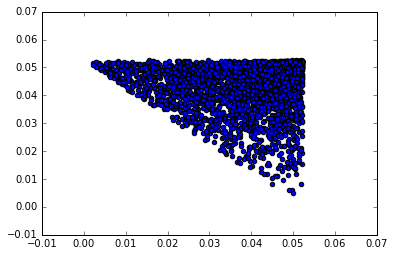

In [25]:
plt.scatter(VALUES[:,0],VALUES[:,2])

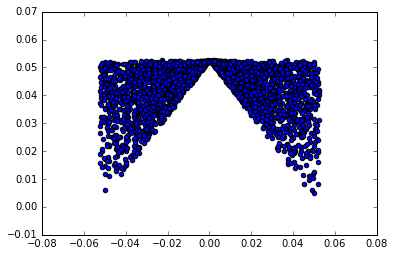

In [26]:
plt.scatter(VALUES[:,1],VALUES[:,2])

In [55]:
VALUES[:,3]

array([ 0.08413026,  0.56428464,  1.63212186, ...,  0.47203722,
        0.63146962,  0.54731331])

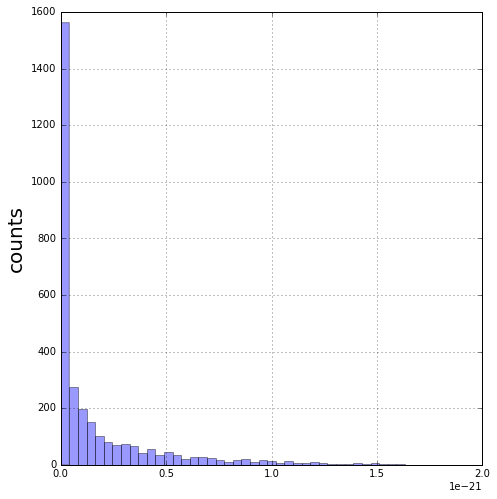

In [64]:
plt.figure(figsize=(7,7))
num =50
#plt.title(r'',fontsize=20)
plt.hist(TEST,alpha=0.4,color='b',bins=np.linspace(0,2e-21))

#plt.xlabel('azimuthal angle ',fontsize=20)
plt.ylabel("counts",fontsize=20)
plt.xlim(0,2e-21)
#plt.ylim(0,90)
#plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
plt.tight_layout()
plt.grid(True)
#plt.savefig('/Users/austinmcdonald/Desktop/fitting/'+'chihistRAND-cutwhole')
plt.show()